In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

['WorldCups.csv', 'WorldCupMatches.csv', 'WorldCupPlayers.csv']


Reference : [Nathan Lauga: Data visualization of FIFA World Cup 📊](https://www.kaggle.com/nathanlauga/data-visualization-of-fifa-world-cup/notebook)

# 0. Clean Data

In [2]:
match_df = pd.read_csv('../input/WorldCupMatches.csv', encoding='Latin-1')
cup_df = pd.read_csv('../input/WorldCups.csv', encoding='Latin-1')

In [3]:
match_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


match_df
- dropna
- year: astype(int)
- split date: str.split('-').str[0] 
- stadium: split and use only first word
- Germany FR -> Germany

확인
- ```match_df[match_df['Home Team Name'].str.contains('Germany')]```

In [4]:
match_df = match_df.dropna()
match_df['Year'] = match_df['Year'].astype(int)
match_df['date'] = match_df['Datetime'].str.split('-').str[0]
match_df['Stadium'] = match_df['Stadium'].str.split().str[0]
match_df = match_df.replace('Germany FR','Germany')

In [5]:
cup_df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


cup_df
- Germany FR -> Germany
- attendance: str.replace('.', '')
- year; astype(str) 
    #TypeError: sequence item 0: expected str instance, int found


In [6]:
cup_df = cup_df.replace('Germany FR','Germany')
cup_df["Attendance"] = cup_df['Attendance'].str.replace('.','').astype(int)
cup_df['Year'] = cup_df['Year'].astype(str)

# 1. Which countries had won the cup ?
- prize 1st, 2nd, 3rd country count
- years of prize

view
- group barh
- x: count
- y: country name 
- show text(year) on each bar

In [7]:
cup_df.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700


In [8]:
winner_count_df = cup_df['Winner'].value_counts().reset_index()
winner_count_df.columns = ['country','count']
winner_count_df

,country,count
0,Brazil,5
1,Italy,4
2,Germany,4
3,Argentina,2
4,Uruguay,2
5,France,1
6,Spain,1
7,England,1


In [9]:
winner_year_df = cup_df.groupby('Winner')['Year'].apply(' '.join).reset_index()
# TypeError: sequence item 0: expected str instance, int found
winner_year_df.columns = ['country','year_str']
winner_year_df

,country,year_str
0,Argentina,1978 1986
1,Brazil,1958 1962 1970 1994 2002
2,England,1966
3,France,1998
4,Germany,1954 1974 1990 2014
5,Italy,1934 1938 1982 2006
6,Spain,2010
7,Uruguay,1930 1950


In [10]:
winner_df = pd.merge(winner_year_df,winner_count_df,on='country')
winner_df

,country,year_str,count
0,Argentina,1978 1986,2
1,Brazil,1958 1962 1970 1994 2002,5
2,England,1966,1
3,France,1998,1
4,Germany,1954 1974 1990 2014,4
5,Italy,1934 1938 1982 2006,4
6,Spain,2010,1
7,Uruguay,1930 1950,2


In [11]:
prize_list = ['Winner','Runners-Up','Third']
prize_df_list = []
for prize in prize_list:
    prize_count = cup_df[prize].value_counts().reset_index()
    prize_count.columns = ['country','{}_count'.format(prize)]
    prize_year = cup_df.groupby(prize)['Year'].apply(' '.join).reset_index()
    prize_year.columns = ['country', '{}_year_str'.format(prize)]
    prize_df = pd.merge(prize_year,prize_count,on='country')
    prize_df_list.append(prize_df)
# all_df = pd.merge(prize_df_list,on='country',how='outer')
# TypeError: merge() missing 1 required positional argument: 'right'

all_df = prize_df_list[0].merge(prize_df_list[1],on='country',how='outer').merge(prize_df_list[2],on='country',how='outer')
all_df = all_df.sort_values(by=['Winner_count','Runners-Up_count','Third_count'], ascending=False)
all_df
# can not write text on bar plot, year_str doesn't make sense

,country,Winner_year_str,Winner_count,Runners-Up_year_str,Runners-Up_count,Third_year_str,Third_count
1,Brazil,1958 1962 1970 1994 2002,5.0,1950 1998,2.0,1938 1978,2.0
4,Germany,1954 1974 1990 2014,4.0,1966 1982 1986 2002,4.0,1934 1970 2006 2010,4.0
5,Italy,1934 1938 1982 2006,4.0,1970 1994,2.0,1990,1.0
0,Argentina,1978 1986,2.0,1930 1990 2014,3.0,NaN,NaN
7,Uruguay,1930 1950,2.0,NaN,NaN,NaN,NaN
3,France,1998,1.0,2006,1.0,1958 1986,2.0
2,England,1966,1.0,NaN,NaN,NaN,NaN
6,Spain,2010,1.0,NaN,NaN,NaN,NaN
10,Netherlands,NaN,NaN,1974 1978 2010,3.0,2014,1.0
8,Czechoslovakia,NaN,NaN,1934 1962,2.0,NaN,NaN


Text(0.5,1,'Number of podium by country')

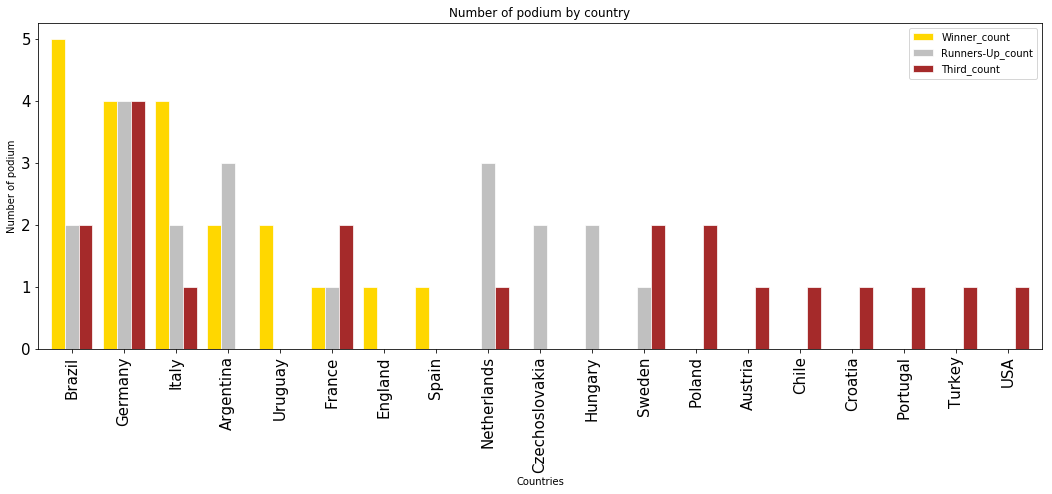

In [12]:
# all_df.plot(kind='barh',x='country',figsize=(12,24),colormap=['gold','silver','brown'])
all_df.plot(kind='bar',x='country',y=['Winner_count','Runners-Up_count','Third_count'],figsize=(18,6),color =['gold','silver','brown'],
           linewidth=0.7, edgecolor='w',fontsize=15,width=0.8, align='center')
# width: bar/bin width
# color=['red','blue','#d88c03']
# plt.grid(True)
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')
# can not write text on!!!!!

In [13]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [14]:
data= []

# each x:country has the ammount of y:prize divided by name/type:prize
# easy to understand to see the data
for prize in prize_list:
    country = all_df['country']
    count = all_df['{}_count'.format(prize)]
    data.append(
        go.Bar(
            x=country,
            y=count,
            name = prize,
        )
    )

layout = go.Layout(
    barmode = "stack", 
    title = "Number of podium by country",
#     showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pyplot-fifa')

In [15]:
data

[Bar({
     'name': 'Winner',
     'x': array(['Brazil', 'Germany', 'Italy', 'Argentina', 'Uruguay', 'France',
                 'England', 'Spain', 'Netherlands', 'Czechoslovakia', 'Hungary',
                 'Sweden', 'Poland', 'Austria', 'Chile', 'Croatia', 'Portugal', 'Turkey',
                 'USA'], dtype=object),
     'y': array([ 5.,  4.,  4.,  2.,  2.,  1.,  1.,  1., nan, nan, nan, nan, nan, nan,
                 nan, nan, nan, nan, nan])
 }), Bar({
     'name': 'Runners-Up',
     'x': array(['Brazil', 'Germany', 'Italy', 'Argentina', 'Uruguay', 'France',
                 'England', 'Spain', 'Netherlands', 'Czechoslovakia', 'Hungary',
                 'Sweden', 'Poland', 'Austria', 'Chile', 'Croatia', 'Portugal', 'Turkey',
                 'USA'], dtype=object),
     'y': array([ 2.,  4.,  2.,  3., nan,  1., nan, nan,  3.,  2.,  2.,  1., nan, nan,
                 nan, nan, nan, nan, nan])
 }), Bar({
     'name': 'Third',
     'x': array(['Brazil', 'Germany', 'Italy', 'Argenti

# 2. Number of goal per country, Top10

In [16]:
match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,date
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,13 Jul 1930
1,1930,13 Jul 1930 - 15:00,Group 4,Parque,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,13 Jul 1930
2,1930,14 Jul 1930 - 12:45,Group 2,Parque,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,14 Jul 1930


In [17]:
home_goal_df = match_df.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
home_goal_df.columns = ['country','home_goal']
home_goal_df.head(3)

,country,home_goal
0,Algeria,5.0
1,Angola,0.0
2,Argentina,111.0


In [18]:
away_goal_df = match_df.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
away_goal_df.columns = ['country','away_goal']
away_goal_df.head(3)

,country,away_goal
0,Algeria,7.0
1,Angola,1.0
2,Argentina,22.0


In [19]:
country_goal_df = pd.merge(home_goal_df,away_goal_df,on='country')
country_goal_df['total_goal'] = country_goal_df['home_goal'] + country_goal_df['away_goal']
country_goal_df = country_goal_df.sort_values(by='total_goal', ascending=False)
country_goal_df.head()

,country,home_goal,away_goal,total_goal
25,Germany,164.0,67.0,231.0
7,Brazil,180.0,45.0,225.0
2,Argentina,111.0,22.0,133.0
34,Italy,99.0,29.0,128.0
23,France,68.0,40.0,108.0


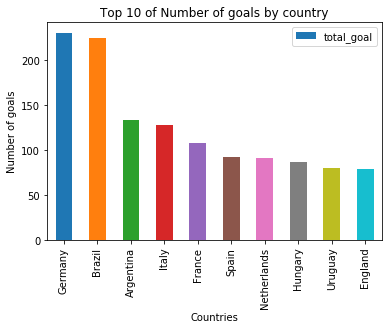

In [20]:
# plt.figure(figsize=(10,6))
# sns.barplot(data=country_goal_df[:10],x='country',y='total_goal')
country_goal_df[:10].plot(kind='bar',y='total_goal',x='country')
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')
plt.show()

# 3. Attendance, number of teams, goals and matchs per cup

In [21]:
cup_df.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700


- GoalsScored: Total goals scored in the worldcup
- QualifiedTeams: Total participating teams
- MatchesPlayed: Total matches played in the cup
- AttendanceTotal:  attendance of the worldcup

In [22]:
plot_list = cup_df.columns.tolist()[-4:]
plot_list

['GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']

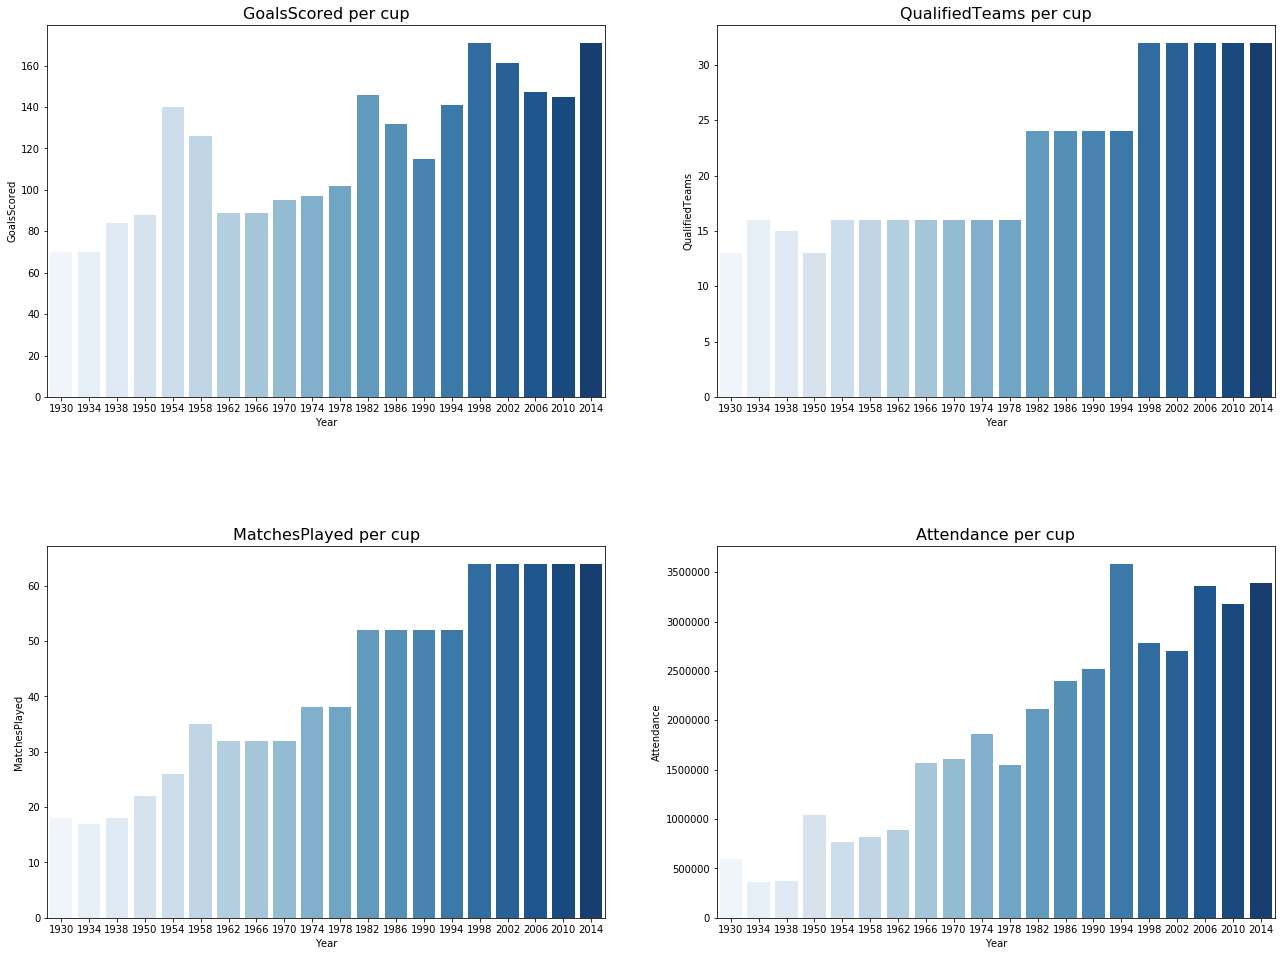

In [23]:
plt.figure(figsize=(22,16))
for i,plot in enumerate(plot_list):
    plt.subplot('22{}'.format(i+1))
    ax = sns.barplot(data=cup_df,x='Year',y=plot, palette='Blues')
    ax.set_title('{} per cup'.format(plot),fontsize=16)
# can only show the last plot?????
# NO!!! data_df.plot() can not be used, sns.barplot() ok!
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

# 4. Which teams scored the most goals per cup ? Top5

In [24]:
match_df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,date
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,13 Jul 1930
1,1930,13 Jul 1930 - 15:00,Group 4,Parque,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,13 Jul 1930
2,1930,14 Jul 1930 - 12:45,Group 2,Parque,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,14 Jul 1930


In [25]:
home_cup_goal = match_df.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home_cup_goal

Year  Home Team Name            
1930  Argentina                     16.0
      Brazil                         4.0
      Chile                          4.0
      France                         4.0
      Paraguay                       1.0
      Romania                        3.0
      USA                            6.0
      Uruguay                       15.0
      Yugoslavia                     6.0
1934  Austria                        5.0
      Czechoslovakia                 8.0
      Germany                       10.0
      Hungary                        4.0
      Italy                         12.0
      Spain                          3.0
      Sweden                         3.0
      Switzerland                    3.0
1938  Brazil                        13.0
      Cuba                           5.0
      Czechoslovakia                 3.0
      France                         3.0
      Hungary                       13.0
      Italy                         11.0
      Sweden            

In [26]:
away_cup_goal = match_df.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away_cup_goal

Year  Away Team Name            
1930  Argentina                      2.0
      Belgium                        0.0
      Bolivia                        0.0
      Brazil                         1.0
      Chile                          1.0
      France                         0.0
      Mexico                         4.0
      Paraguay                       0.0
      Peru                           1.0
      Romania                        0.0
      USA                            1.0
      Yugoslavia                     1.0
1934  Argentina                      2.0
      Austria                        2.0
      Belgium                        2.0
      Brazil                         1.0
      Czechoslovakia                 1.0
      Egypt                          2.0
      France                         2.0
      Germany                        1.0
      Hungary                        1.0
      Netherlands                    2.0
      Romania                        1.0
      Spain             

In [27]:
# country_cup_goal_df = pd.merge(home_cup_goal, away_cup_goal)
# ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>
country_cup_goal_df = pd.concat([home_cup_goal, away_cup_goal],axis=1)

In [28]:
country_cup_goal_df.head(15)

Home Team Goals  Away Team Goals
1930 Argentina              16.0              2.0
     Belgium                 NaN              0.0
     Bolivia                 NaN              0.0
     Brazil                  4.0              1.0
     Chile                   4.0              1.0
     France                  4.0              0.0
     Mexico                  NaN              4.0
     Paraguay                1.0              0.0
     Peru                    NaN              1.0
     Romania                 3.0              0.0
     USA                     6.0              1.0
     Uruguay                15.0              NaN
     Yugoslavia              6.0              1.0
1934 Argentina               NaN              2.0
     Austria                 5.0              2.0

In [29]:
country_cup_goal_df = country_cup_goal_df.reset_index()
country_cup_goal_df.columns = ['year','country','home_goal','away_goal']

In [30]:
country_cup_goal_df.head(15)

,year,country,home_goal,away_goal
0,1930,Argentina,16.0,2.0
1,1930,Belgium,NaN,0.0
2,1930,Bolivia,NaN,0.0
3,1930,Brazil,4.0,1.0
4,1930,Chile,4.0,1.0
5,1930,France,4.0,0.0
6,1930,Mexico,NaN,4.0
7,1930,Paraguay,1.0,0.0
8,1930,Peru,NaN,1.0
9,1930,Romania,3.0,0.0


In [31]:
country_cup_goal_df['total_goal'] = country_cup_goal_df['home_goal'] + country_cup_goal_df['away_goal']

In [32]:
country_cup_goal_df.head(3)

,year,country,home_goal,away_goal,total_goal
0,1930,Argentina,16.0,2.0,18.0
1,1930,Belgium,NaN,0.0,NaN
2,1930,Bolivia,NaN,0.0,NaN


In [33]:
new_df = country_cup_goal_df.copy()

In [34]:
new_df = new_df.sort_values(by=['year','total_goal'], ascending=[True,False])
new_df = new_df.groupby('year').head(5)
new_df.head(10)

,year,country,home_goal,away_goal,total_goal
0,1930,Argentina,16.0,2.0,18.0
10,1930,USA,6.0,1.0,7.0
12,1930,Yugoslavia,6.0,1.0,7.0
3,1930,Brazil,4.0,1.0,5.0
4,1930,Chile,4.0,1.0,5.0
20,1934,Germany,10.0,1.0,11.0
17,1934,Czechoslovakia,8.0,1.0,9.0
14,1934,Austria,5.0,2.0,7.0
21,1934,Hungary,4.0,1.0,5.0
27,1934,Switzerland,3.0,2.0,5.0


In [35]:
# new_df = pd.DataFrame.from_dict(new_df.to_dict())
# new_df = new_df.sort_values(by=['year','total_goal'], ascending=[True,False])
# new_df = new_df.groupby('year').head(5)

# no need to transform to dict and re-transform to df

In [36]:
country_list = new_df['country'].value_counts().index.tolist()
data = []
for country in country_list:
    year = new_df[new_df['country']==country]['year']
    goal = new_df[new_df['country']==country]['total_goal']
    data.append(
        go.Bar(
            x=year,
            y=goal,
            name=country
        )
    )
layout = go.Layout(
    barmode = "stack", 
    title = "Top 5 teams which scored the most goals",
    showlegend = False
)    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pyplot-fifa')